In [1]:
##### setup ####

# install packages
packages <- c("tidyverse","GMSimpute","ggplot2")
install.packages(packages)

# load packages
library(tidyverse)
library(GMSimpute)
library(ggplot2)


The downloaded binary packages are in
	/var/folders/4m/5xvrvzmx5y3gjbwk11gtj2240000gn/T//RtmpBHcv3U/downloaded_packages


── Attaching core tidyverse packages ──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.2     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.3     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.1     
── Conflicts ────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [18]:
# read the data
prot_data <- read.csv("./data/Na/AbsAbundance.csv", row.names = 1)
sample_info <- read.csv("./data/sample_info.csv")

head(prot_data)

,deltaKHGFP1,deltaKHGFP2,deltaKHGFP3,GFP1,GFP2,GFP3,KHNYNGFP1,KHNYNGFP2,KHNYNGFP3,NESGFP1,NESGFP2,NESGFP3,ZebrafishGFP1,ZebrafishGFP2,ZebrafishGFP3
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
O15037,106274017.4,607779548,2997612521,23978784,6643256,18782359,1027273344,468145666,388344239,104332491,179588327,1351239969,11200040.8,12158720.3,4575316
P06733,2746716.2,2234227,40419424,27942658,30016490,143843175,2297048,2091665,44666950,1881510,2853341,137987413,2236254.9,2187415.4,56713787
P60709,5574507.2,8894103,60987258,37420658,56296304,244709899,4279354,4452027,61618354,3786693,4109724,162145643,1955653.6,1318717.1,83273962
P10809,5014508.7,5164763,36680114,4437620,5231115,93392430,6164806,6305649,37078502,4214371,2752210,59975109,2257687.8,1461746.9,47796007
P14618,832419.3,1238794,12617019,9517730,12012175,82062862,2160865,2021858,11433106,2117715,2355380,65088824,447807.8,1361622.1,22407256
P11021,6593761.3,9038695,7929232,3426658,3867495,39741090,4609903,6112483,4313681,5231630,6697205,34983485,3239269.2,951092.1,10124955


In [25]:
# impute data for missing values
# removes rows with >50% MVs and infers the rest
imput_data <- GMS.Lasso(prot_data)

Filtering: remove rows with more than 50% missing

Warning message:
“Option grouped=FALSE enforced in cv.glmnet, since < 3 observations per fold”
Warning message:
“Option grouped=FALSE enforced in cv.glmnet, since < 3 observations per fold”
Warning message:
“Option grouped=FALSE enforced in cv.glmnet, since < 3 observations per fold”
Warning message:
“Option grouped=FALSE enforced in cv.glmnet, since < 3 observations per fold”
Warning message:
“Option grouped=FALSE enforced in cv.glmnet, since < 3 observations per fold”
Warning message:
“Option grouped=FALSE enforced in cv.glmnet, since < 3 observations per fold”
Warning message:
“Option grouped=FALSE enforced in cv.glmnet, since < 3 observations per fold”
Warning message:
“Option grouped=FALSE enforced in cv.glmnet, since < 3 observations per fold”
Warning message:
“Option grouped=FALSE enforced in cv.glmnet, since < 3 observations per fold”
Warning message:
“Option grouped=FALSE enforced in cv.glmnet, since < 3 observations per fold”
Warning message:
“Option grouped=FALSE enforced in

In [26]:
# transform the data to have variables as columns and samples as rows
trans_data <- t(imput_data)

# scale data to avoid bias of extreme values
norm_data <- scale(trans_data)

In [31]:
# Perform the PCA
sample_pca <- prcomp(norm_data)
summary(sample_pca)

Importance of components:
                           PC1     PC2    PC3     PC4     PC5     PC6     PC7
Standard deviation     16.5508 11.1541 9.7821 7.68353 7.04256 5.65931 5.27613
Proportion of Variance  0.3544  0.1610 0.1238 0.07637 0.06416 0.04143 0.03601
Cumulative Proportion   0.3544  0.5153 0.6391 0.71549 0.77965 0.82108 0.85709
                           PC8     PC9    PC10    PC11   PC12    PC13    PC14
Standard deviation     4.87316 4.67953 4.30167 3.77273 3.7305 3.24973 2.75780
Proportion of Variance 0.03072 0.02833 0.02394 0.01841 0.0180 0.01366 0.00984
Cumulative Proportion  0.88782 0.91614 0.94008 0.95850 0.9765 0.99016 1.00000
                            PC15
Standard deviation     4.232e-15
Proportion of Variance 0.000e+00
Cumulative Proportion  1.000e+00

In [33]:
# Convert matrix to tibble - add colnames to a new column called "gene"
as_tibble(norm_data, rownames = "sample")

pc_eigenvalues <- sample_pca$sdev^2

# create a "tibble" manually with 
# a variable indicating the PC number
# and a variable with the variances
pc_eigenvalues <- tibble(PC = factor(1:length(pc_eigenvalues)), 
                         variance = pc_eigenvalues) %>% 
  # add a new column with the percent variance
  mutate(pct = variance/sum(variance)*100) %>% 
  # add another column with the cumulative variance explained
  mutate(pct_cum = cumsum(pct))

# print the result
pc_eigenvalues

sample,O15037,P06733,P60709,P10809,P14618,P11021,P13639,P07437,P08238,⋯,O15226,Q86Y79,Q5T4D3,Q8N1N4,O95777,A6NHL2,O94876,Q7Z3Z0,B7ZBB8,Q8NFD4
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
deltaKHGFP1,-0.47243575,-0.6436860,-0.62503683,-0.5827143,-0.5799996,-0.27860307,-0.7379281,-0.6859998,-0.4791462,⋯,1.70939207,-0.47202709,0.87079342,-0.34035659,-0.68657559,-0.57924256,1.1532326,0.2452073,-0.2727237,-0.5894065
deltaKHGFP2,0.14955412,-0.6544684,-0.57768016,-0.5773031,-0.5635700,-0.06553545,-0.5922000,-0.6406153,-0.4290993,⋯,1.56278809,-0.38369340,2.06866507,-0.27998085,-0.68197669,-0.55342156,2.6394481,-0.1560009,-0.2069243,0.1515831
deltaKHGFP3,3.11353318,0.1489206,0.16546986,0.5576637,-0.1035539,-0.16222137,0.6517608,0.3192671,-0.2644204,⋯,0.26272287,0.04607214,-0.90001681,-0.40976288,0.57552965,3.25340373,-0.5975505,-0.1560009,-0.2514990,0.8648672
GFP1,-0.57450202,-0.1135815,-0.17072630,-0.6034898,-0.2288566,-0.55460531,0.1380184,0.2196096,-0.2799912,⋯,-1.35194530,-0.44813702,-1.05155868,-0.39621739,0.99335789,-0.10252846,-0.9168419,2.8862573,-0.3872903,-1.3658501
GFP2,-0.59600233,-0.0699496,0.09854969,-0.5749136,-0.1280074,-0.51618784,0.5420955,0.3961618,-0.1729323,⋯,-1.33337640,-0.47685281,-1.06314820,-0.22877490,0.50323218,-0.21921078,-0.8611092,-0.7795312,-0.3674598,-1.2849152
GFP3,-0.58094686,2.3248819,2.78641857,2.6000523,2.7041081,2.61007336,1.9206785,2.3872291,1.8916888,⋯,-1.26444857,3.23606221,-1.07898428,-0.40419650,-0.19948582,-0.09878434,-0.7545006,-0.1560009,-0.1586273,-0.9737356
KHNYNGFP1,0.66982932,-0.6531467,-0.64351321,-0.5412885,-0.5262911,-0.45148953,-0.8475171,-0.5304288,-0.4881727,⋯,-0.22068623,-0.38148798,0.75611432,-0.40173517,-0.60684782,-0.56294674,0.3233179,-0.8084245,-0.1256794,-0.1464443
KHNYNGFP2,-0.02362614,-0.6574678,-0.64104989,-0.5362162,-0.5319111,-0.32054479,-0.7780160,-0.6260554,-0.4730877,⋯,-0.33303505,-0.31967451,0.46830702,-0.37657745,-0.50170752,-0.56561616,0.7496931,-1.6473247,3.6006366,0.1834983
KHNYNGFP3,-0.12259949,0.2382855,0.17447295,0.5720109,-0.1514189,-0.47730426,0.6237938,-0.4154449,-0.2703510,⋯,-0.08191378,-0.14757212,-0.96854917,-0.36341850,0.98295628,0.32738583,-0.6769660,-0.1560009,-0.3734072,-0.5299084


PC,variance,pct,pct_cum
<fct>,<dbl>,<dbl>,<dbl>
1,2.739304e+02,3.543731e+01,35.43731
2,1.244139e+02,1.609495e+01,51.53226
3,9.568951e+01,1.237898e+01,63.91124
4,5.903659e+01,7.637333e+00,71.54857
5,4.959767e+01,6.416258e+00,77.96483
6,3.202778e+01,4.143310e+00,82.10814
7,2.783756e+01,3.601236e+00,85.70937
8,2.374764e+01,3.072140e+00,88.78151
9,2.189796e+01,2.832854e+00,91.61437


sample,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
deltaKHGFP1,-13.907215,-0.0810305,-5.0911159,2.7463057,-1.4962911,-3.003403144,6.1564695,-4.0890519,-1.49704245,1.3573913,1.5157430,-1.3159025,8.88997346,-3.48645474,-5.394761e-15
deltaKHGFP2,-13.084479,-1.7554093,-7.3929397,7.3615166,-10.7395335,-3.846868207,6.6108483,-3.2984267,-5.39794822,1.7671605,-4.5911840,-1.3241360,-5.36887869,1.45005105,5.568235e-15
deltaKHGFP3,20.539482,-21.3544937,11.0670441,5.1990318,-5.5019449,-11.526125469,-3.7871942,2.6861690,2.85523746,-0.7343459,0.9062486,-0.7330237,0.71236070,0.04510452,4.682095e-15
GFP1,2.102863,20.7809682,16.0683985,-3.6057927,-3.4930746,-1.519209666,1.0171643,-4.8878892,3.41191131,-8.8407717,-2.3624636,-1.3248523,-0.31018282,-0.35855907,-8.275720e-15
GFP2,3.842711,19.2601589,13.7539961,-2.0112167,-4.0037601,-0.648407285,-1.6451471,4.5517018,-3.59349327,10.0596052,2.7950083,0.9826486,-0.06937914,0.14024780,1.909059e-16
GFP3,35.111552,14.4317922,-15.3556037,13.9345630,7.1411900,-0.006544341,-0.4426640,0.8371794,0.72201769,-0.8009451,-0.3005820,0.3309274,0.07295891,0.08656416,-1.067205e-14
KHNYNGFP1,-10.612632,-1.8309386,-2.3629256,0.8657573,-3.5826086,2.897146909,-6.2845663,5.8086267,-6.73391143,-5.4964809,-2.5821407,8.0265963,1.91340683,-0.61168169,2.931483e-15
KHNYNGFP2,-11.975534,-1.3892767,-4.2342743,2.7785325,-4.7759285,7.611057182,-5.4680313,5.8965763,0.12495532,-2.5813940,2.8806494,-9.4446751,-0.40103871,-0.50867380,6.983828e-16
KHNYNGFP3,9.110952,-10.9540728,10.1790607,0.4984373,3.8830777,9.202807056,12.8815435,5.7722329,1.88707865,-0.6837783,-0.4134370,1.4794252,-0.64612647,-0.15851163,2.915514e-16


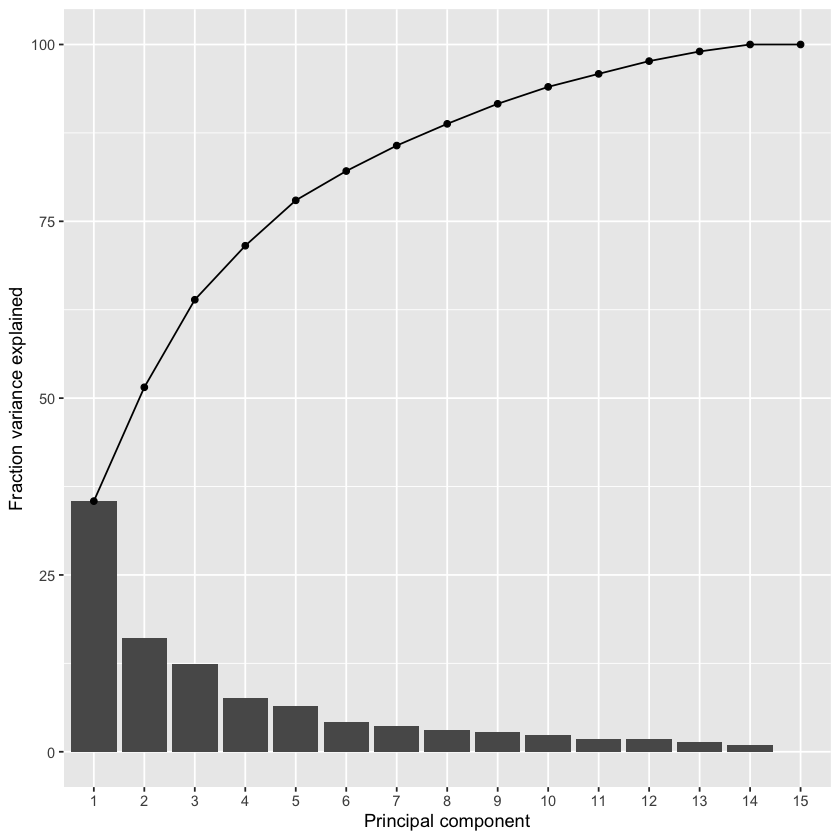

In [34]:
# generate scree plot
pc_eigenvalues %>% 
  ggplot(aes(x = PC)) +
  geom_col(aes(y = pct)) +
  geom_line(aes(y = pct_cum, group = 1)) + 
  geom_point(aes(y = pct_cum)) +
  labs(x = "Principal component", y = "Fraction variance explained")

# The PC scores are stored in the "x" value of the prcomp object
pc_scores <- sample_pca$x

pc_scores <- pc_scores %>% 
  # convert to a tibble retaining the sample names as a new column
  as_tibble(rownames = "sample")

# print the result
pc_scores

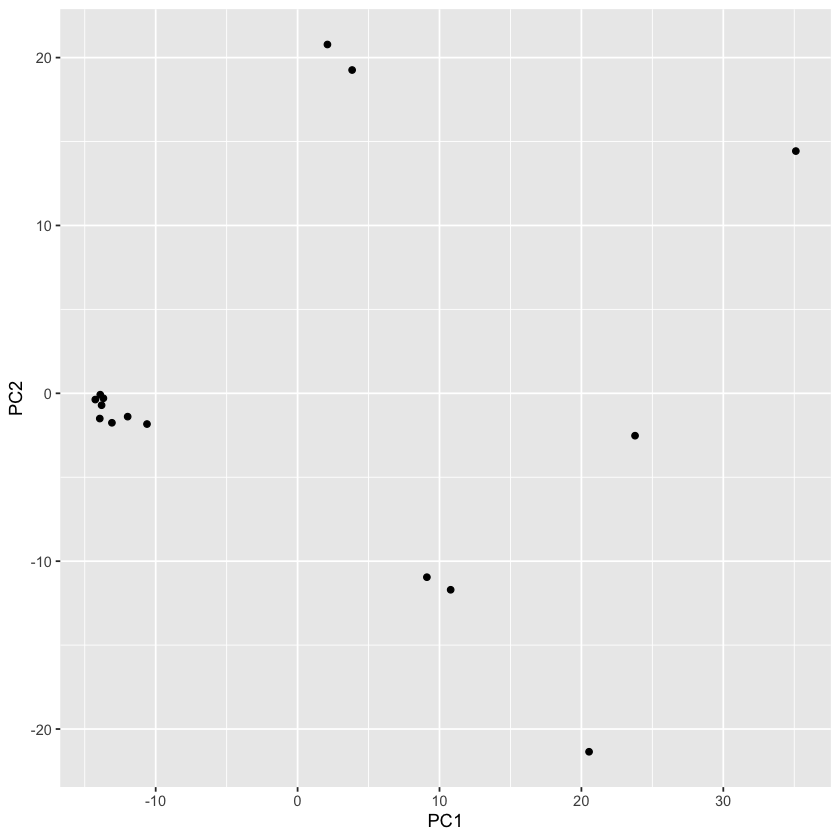

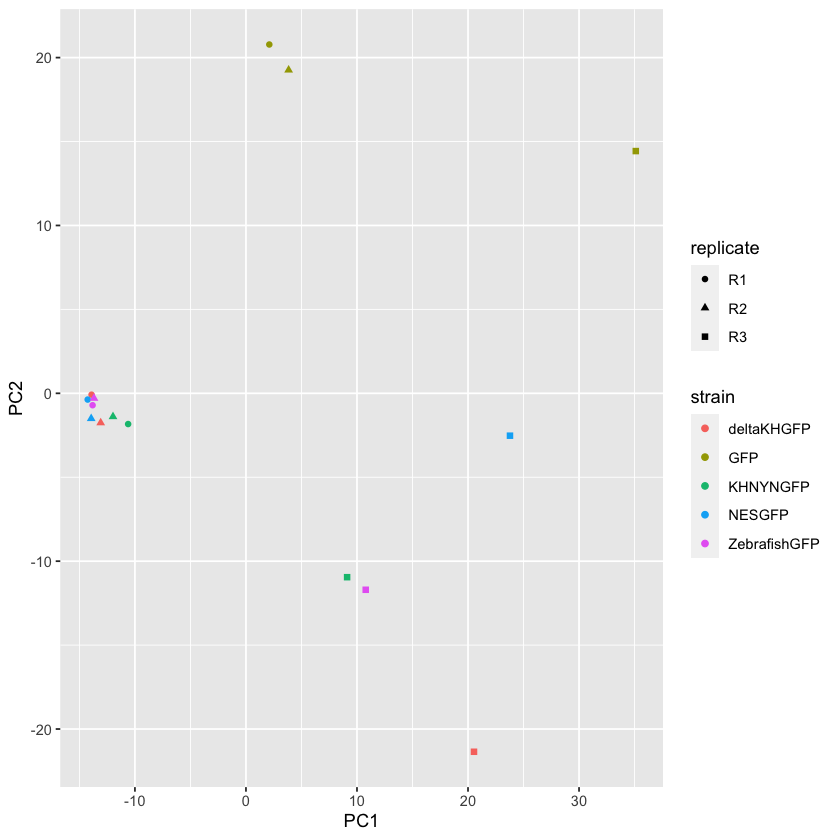

In [35]:
pc_scores %>% 
  # create the plot
  ggplot(aes(x = PC1, y = PC2)) +
  geom_point()

pca_plot <- sample_pca$x %>% # extract the loadings from prcomp
  # convert to a tibble retaining the sample names as a new column
  as_tibble(rownames = "sample") %>% 
  # join with "sample_info" table 
  full_join(sample_info, by = "sample") %>% 
  # create the plot
  ggplot(aes(x = PC1, y = PC2, colour = strain, shape = replicate)) +
  geom_point()

# print the result (in this case a ggplot)
pca_plot

In [36]:
pc_loadings <- sample_pca$rotation

# explore correlations
pc_loadings <- pc_loadings %>% 
  as_tibble(rownames = "gene")

# print the result
pc_loadings

gene,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
O15037,0.021918042,-0.0532335318,0.006306622,-0.0086036472,-0.0647634865,-0.0734431546,-0.0312984227,0.054998276,0.0037700407,-3.652649e-02,0.0003214836,0.0131395747,0.0058935677,-1.013604e-03,-0.3448956775
P06733,0.055467678,0.0102878242,-0.032339442,-0.0211358964,0.0063664378,0.0163286264,0.0075239334,-0.014546128,-0.0020238537,3.193458e-03,-0.0018642353,0.0010474515,-0.0022513380,2.417678e-03,0.0281988080
P60709,0.055821485,0.0163215480,-0.031007418,0.0030808895,0.0129805180,0.0143683936,0.0037877796,-0.010626128,-0.0048832535,1.003014e-02,-0.0011768914,0.0023887635,-0.0021602346,4.217272e-03,0.2034091592
P10809,0.055532849,-0.0082023552,-0.030044680,0.0128587321,0.0202479475,0.0258736628,0.0049928820,-0.016336176,-0.0063755705,-1.665401e-03,-0.0063704148,0.0003064598,0.0037694792,5.625777e-03,-0.6283655647
P14618,0.052052753,0.0180624223,-0.045223222,-0.0102438004,0.0106060007,0.0122242177,-0.0030509694,-0.013021814,-0.0025284832,1.381913e-03,0.0012100358,0.0027688823,-0.0023419790,6.207559e-03,0.0259248225
P11021,0.045514248,0.0124038921,-0.064449787,-0.0064789117,-0.0070960181,0.0069214695,-0.0016761265,-0.019346591,0.0017715559,2.329407e-03,-0.0036543941,-0.0022952797,-0.0008950877,1.033571e-03,0.4052904498
P13639,0.058288948,0.0095481955,-0.007807290,-0.0206143739,-0.0091759053,0.0078634914,0.0215331158,-0.001946255,-0.0028853229,1.811590e-02,0.0072049223,-0.0006093175,-0.0091153894,-3.222100e-05,0.1608787039
P07437,0.054914171,0.0233253373,-0.027354134,-0.0179407250,-0.0048367737,-0.0045106736,-0.0172177213,-0.012687546,-0.0067574464,6.226665e-03,-0.0009380256,-0.0009037392,-0.0001828859,-1.786074e-03,0.1151382428
P08238,0.045253752,0.0140786299,-0.053512121,-0.0480048983,-0.0059747898,0.0036848952,0.0051514486,-0.005767085,-0.0006960131,3.492385e-03,-0.0008829771,-0.0013835672,-0.0038174256,4.230501e-03,0.2394484757


[1] "P39687" "Q12931" "P38646" "P13639" "P33316" "Q04837" "P63104" "Q15084"
 [9] "P14174" "P07741" "Q9NQC3" "P26447" "Q9UI15" "O94901" "P62861" "Q13618"
[17] "P41273" "O95782" "Q09666" "P07910"

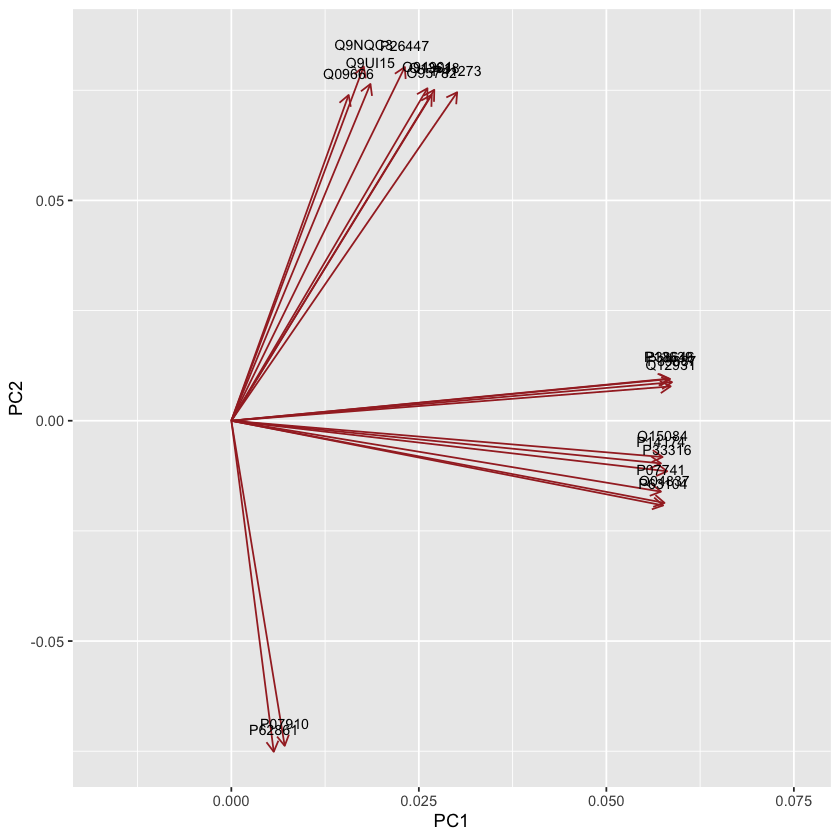

In [37]:
# What are the top 10 genes with highest loading on PC1 and PC2?
top_genes <- pc_loadings %>% 
  # select only the PCs we are interested in
  select(gene, PC1, PC2) %>%
  # convert to a "long" format
  pivot_longer(matches("PC"), names_to = "PC", values_to = "loading") %>% 
  # for each PC
  group_by(PC) %>% 
  # arrange by descending order of loading
  arrange(desc(abs(loading))) %>% 
  # take the 10 top rows
  slice(1:10) %>% 
  # pull the gene column as a vector
  pull(gene) %>% 
  # ensure only unique genes are retained
  unique()

top_genes

top_loadings <- pc_loadings %>% 
  filter(gene %in% top_genes)

loadings_plot <- ggplot(data = top_loadings) +
  geom_segment(aes(x = 0, y = 0, xend = PC1, yend = PC2), 
               arrow = arrow(length = unit(0.1, "in")),
               colour = "brown") +
  geom_text(aes(x = PC1, y = PC2, label = gene),
            nudge_y = 0.005, size = 3) +
  scale_x_continuous(expand = c(0.02, 0.02)) + 
  labs(x = "PC1", y = "PC2")

loadings_plot